In [51]:
# magic incantation to make the notebook wider
from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

In [16]:
#magic incantation to make all text in LaTeX font:
from matplotlib import rc
# rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [18]:
import numpy as np
import pylab as pl
import os, sys
%matplotlib inline

import new_functions as fn
fn = reload(fn)

# XMAX = 200
# XMIN = 50
# YMAX = 200
# YMIN = 50

XMAX = 256
XMIN = 0
YMAX = 256
YMIN = 0

In [26]:
timepix_data_dir_ir = '/Users/mfisherlevine/Downloads/160728_usaf2/'


dirs = [timepix_data_dir_ir + _ for _ in os.listdir(timepix_data_dir_ir)]
tp_datafiles_ir = []
for this_dir in dirs:
    tp_datafiles_ir.extend([os.path.join(this_dir, _) for _ in os.listdir(this_dir)])
print 'Found %s datafiles in run %s'%(len(tp_datafiles_ir), timepix_data_dir_ir)


Found 10000 datafiles in run /Users/mfisherlevine/Downloads/160728_usaf2/


In [27]:
tp_data_ir = {}
n_files_loaded = 0
for filename in tp_datafiles_ir:
    n_codes = fn.Get_n_timecodesFromFile(filename)
    if not filename in tp_data_ir.keys():
        tp_data_ir[filename] = {}
        tp_data_ir[filename]['n_codes'] = n_codes
        tp_data_ir[filename]['filename'] = filename
    else:
        print 'Would have overwritten bunchID %s'%bunchID
    n_files_loaded += 1

print '*****\nLoaded %s files' %n_files_loaded



*****
Loaded 10000 files


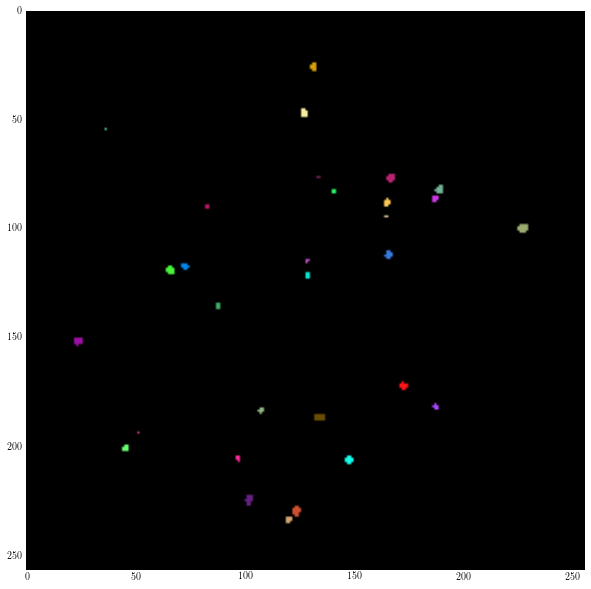

In [30]:
fn = reload(fn)

# fn.ShowClusteredImage('/Users/mfisherlevine/Downloads/160721_voltages1/160721_v9/160721_v9_0250.txt',257)
fn.ShowClusteredImage(tp_datafiles_ir[0],257,skiplines=1)

In [33]:
fn = reload(fn)
import time

# NB These are different units!
TCUT = 257 #Raw timecode cut for centroiding
# TZERO = 1700 #Time, in ns, after inversion and conversion, to set as t0
TZERO = 0 #Time, in ns, after inversion and conversion, to set as t0

run_id = 'tcut%s_tzero%s'%(TCUT, TZERO)

now = time.time()
for i, filename in enumerate(tp_data_ir.keys()):
    if i%500==0:print 'Centroided %s frames'%i; sys.stdout.flush()

    filename = tp_data_ir[filename]['filename']
    dummy, xs, ys, ts, npixs = fn.GetCentroidsXYTFromFile(filename, TCUT,winow_xmax=XMAX,winow_xmin=XMIN,winow_ymax=YMAX,winow_ymin=YMIN,skiplines=1)#, gating=[8400,8])
    tp_data_ir[filename]['xs'] = xs
    tp_data_ir[filename]['ys'] = ys
#         tp_data[filename]['ts'] = [(_-TZERO)*20 for _ in ts]#already inverted, just translate to ns
    tp_data_ir[filename]['ts'] = [(_-TZERO) for _ in ts]#already inverted, just translate to ns
    tp_data_ir[filename]['npixs'] = npixs
    tp_data_ir[filename]['n_ions'] = len(xs)
print 'Finished IR'


Centroided 0 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@7271_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@3776_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@6652_1.txt - TCUT = 257
Centroided 500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@783_1.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@1332_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@6839_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@3054_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@6957_1.txt - TCUT = 257
Centroided 1000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@4971_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@4471_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@7832_1.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@7711_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@6462_1.txt - TCUT = 257
Centroided 1500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@6589_1.txt - TCUT = 257
Centroided 2000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@6747_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@6304_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@4644_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@1115_1.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@1996_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 2500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@2421_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@6743_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@135_1.txt - TCUT = 257
Centroided 3000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@898_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@248_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@1391_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@2365_1.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@5901_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@5500_1.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@9766_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 3500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@8895_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@1624_1.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@357_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@7171_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@8219_1.txt - TCUT = 257
Centroided 4000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@7070_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@1708_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 4500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@1066_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@8898_1.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@8659_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@5725_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@5423_1.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@4411_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@1409_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@5855_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@8293_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@3415_1.txt - TCUT = 257
Centroided 5000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@8056_1.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@3824_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@6519_1.txt - TCUT = 257
Centroided 5500 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@4969_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@7678_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@1934_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@7655_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@6713_1.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@7460_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 6000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@2088_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@7923_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@7339_1.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@8424_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@2243_1.txt - TCUT = 257
Centroided 6500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@3723_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@4896_1.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@865_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@8015_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@1900_1.txt - TCUT = 257
Centroided 7000 frames


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@6500_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@8839_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@5013_1.txt - TCUT = 257
Centroided 7500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@6141_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@933_1.txt - TCUT = 257


/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:893: UserWarning: loadtxt: Empty input file: "/Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@9845_1.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


Centroided 8000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@3410_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@5431_1.txt - TCUT = 257
Centroided 8500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@3130_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@3154_1.txt - TCUT = 257
Centroided 9000 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@2879_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@9707_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@1356_1.txt - TCUT = 257
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@6623_1.txt - TCUT = 257
Centroided 9500 frames
Found 1 clusters in /Users/mfisherlevine/Downloads/160728_usaf2/00/usaf2@9671_1.txt - TCUT = 257
Finished IR


In [34]:
# Put all the centroided timecodes in a single list for convenience
all_ts_ir = []
n_loaded = 0
for bunchID in tp_data_ir.keys():
    if 'ts' in tp_data_ir[bunchID].keys():
        all_ts_ir.extend(tp_data_ir[bunchID]['ts'])
        n_loaded += 1
print 'IR: Collated centroided timecodes from %s shots'%n_loaded
print 'IR: %s times in total'%len(all_ts_ir)


IR: Collated centroided timecodes from 10000 shots
IR: 330189 times in total


In [35]:
# Put all the centroided timecodes in a single list for convenience
all_ts_4pix_ir = []
n_loaded = 0
for bunchID in tp_data_ir.keys():
    if 'ts' in tp_data_ir[bunchID].keys():
        for npix, t in zip(tp_data_ir[bunchID]['npixs'],tp_data_ir[bunchID]['ts']):
            if npix>=4:
                all_ts_4pix_ir.append(t)
                n_loaded += 1
print 'IR: %s times in total'%len(all_ts_4pix_ir)
    

IR: 302048 times in total


In [214]:
count = 0
for bunchID in tp_data_ir.keys():
    count += len(tp_data_ir[bunchID]['ts'])
print count

229432


In [37]:
# Load the raw timecodes, converting the same way as the others
fn = reload(fn)

raw_timecodes_ir = []
for i, filename in enumerate(tp_datafiles_ir):
    if i%1000==0: print 'Loaded %s files'%i; sys.stdout.flush()
#     raw_timecodes_ir.extend(((11810-_)-TZERO) for _ in fn.GetTimecodes_SingleFile(filename, skiplines=0))
    raw_timecodes_ir.extend(((11810-_)-TZERO) for _ in fn.GetTimecodes_SingleFile(filename, skiplines=1,winow_xmax=XMAX,winow_xmin=XMIN,winow_ymax=YMAX,winow_ymin=YMIN))
print 'IR: Loaded %s raw timecodes'%len(raw_timecodes_ir)


Loaded 0 files
Loaded 1000 files
Loaded 2000 files
Loaded 3000 files
Loaded 4000 files
Loaded 5000 files
Loaded 6000 files
Loaded 7000 files
Loaded 8000 files
Loaded 9000 files
IR: Loaded 2884474 raw timecodes


In [22]:
print len(tp_datafiles_ir)

10000


Raw timecodes a histogram:


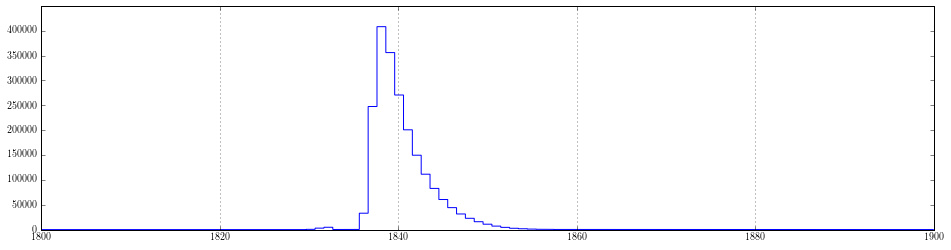

As a histogram:


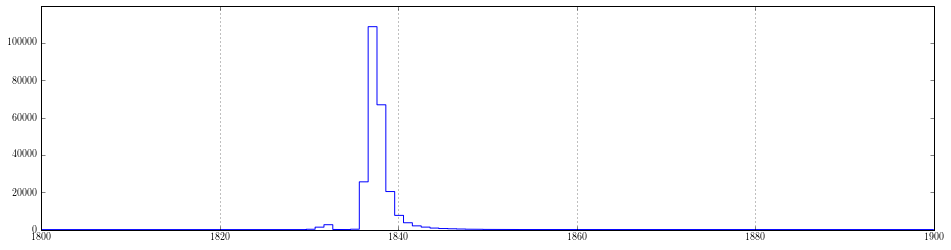

With 4 pixel threshold:


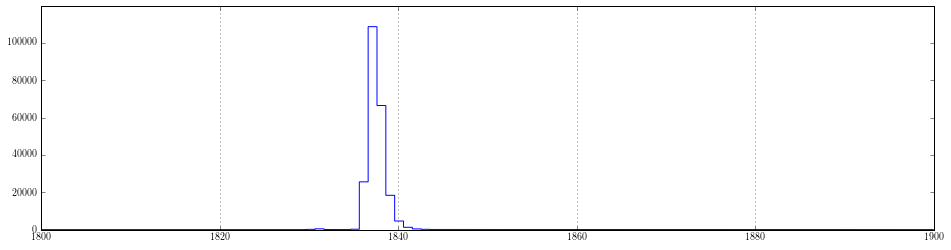

In [42]:
# range = [900,1200]
range = [1800,1900]

############
# for the raw spectrum:

y_rescale = 1.1 # big peak is too big, so clip y-axis by rescaling to this fraction of max
bins = min(int((max(raw_timecodes_ir)-min(raw_timecodes_ir)+1)),(range[1]-range[0]+1))
# print bins
fig = pl.figure(figsize=[16,4])
ax = pl.subplot(111)

# as a hist
print 'Raw timecodes a histogram:'
ys_ir, binEdges_ir, dummy1 = pl.hist(raw_timecodes_ir, bins=bins, range=range, histtype = 'step')
# bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
lims = pl.ylim()
pl.ylim([lims[0], y_rescale*max(ys_ir)])
# ax.set_xticks(ticks, minor=False)
# turn_raw, stat_raw, troughs_raw, peaks_raw = fn.GetTurningPoints(ys, bincenters, noise=20)
# ax.set_xticks(troughs_raw, minor=False)
ax.xaxis.grid(True, which='major')
pl.xlim(range[0],range[1])
pl.show()


############
# for the centroided spectrum:

y_rescale = 1.1 # big peak is too big, so clip y-axis by rescaling to this fraction of max
# bins = min(int((max(all_ts)-min(all_ts)+1)),(range[1]-range[0]+1))

fig = pl.figure(figsize=[16,4])
ax = pl.subplot(111)

# as a hist
print 'As a histogram:'
ys_ir, binEdges_ir, dummy1 = pl.hist(all_ts_ir, bins=bins, range=range, histtype = 'step')

# bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
# turn_cent, stat_cent, troughs_cent, peaks_cent = fn.GetTurningPoints(ys, bincenters, noise=1)
lims = pl.ylim()
pl.xlim(range[0],range[1])
pl.ylim([lims[0], y_rescale*max(ys_ir)])
# ax.set_xticks(troughs_cent, minor=False)
ax.xaxis.grid(True, which='major')
pl.show()

# as a hist
fig = pl.figure(figsize=[16,4])
ax = pl.subplot(111)
print 'With 4 pixel threshold:'
ys_ir, binEdges_ir, dummy1 = pl.hist(all_ts_4pix_ir, bins=bins, range=range, histtype = 'step')

# bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
# turn_cent, stat_cent, troughs_cent, peaks_cent = fn.GetTurningPoints(ys, bincenters, noise=0)
lims = pl.ylim()
pl.xlim(range[0],range[1])
pl.ylim([lims[0], y_rescale*max(ys_ir)])
# ax.set_xticks(troughs_cent, minor=False)
ax.xaxis.grid(True, which='major')
pl.show()


In [228]:
for t, y in zip(binEdges_ir,ys_ir):
    print t, y

900.0 0.0
900.996677741 0.0
901.993355482 1.0
902.990033223 15.0
903.986710963 32.0
904.983388704 26.0
905.980066445 1.0
906.976744186 1.0
907.973421927 3.0
908.970099668 1.0
909.966777409 1.0
910.96345515 4.0
911.96013289 15.0
912.956810631 93.0
913.953488372 667.0
914.950166113 2521.0
915.946843854 5527.0
916.943521595 7843.0
917.940199336 7213.0
918.936877076 5413.0
919.933554817 3347.0
920.930232558 1997.0
921.926910299 1350.0
922.92358804 998.0
923.920265781 874.0
924.916943522 786.0
925.913621262 768.0
926.910299003 664.0
927.906976744 625.0
928.903654485 671.0
929.900332226 557.0
930.897009967 588.0
931.893687708 562.0
932.890365449 577.0
933.887043189 504.0
934.88372093 473.0
935.880398671 496.0
936.877076412 459.0
937.873754153 415.0
938.870431894 410.0
939.867109635 410.0
940.863787375 391.0
941.860465116 373.0
942.857142857 349.0
943.853820598 379.0
944.850498339 352.0
945.84717608 343.0
946.843853821 290.0
947.840531561 312.0
948.837209302 329.0
949.833887043 285.0
950.8305

In [43]:
bands = []
# # for i in xrange(len(troughs_cent)-1):
# #     bands.append((troughs_cent[i],troughs_cent[i+1]))
# # print bands
# bands.append([0,250])

# bands.append([900,910])
# bands.append([910,920])
# bands.append([920,930])
# bands.append([930,940])
# bands.append([940,950])
# bands.append([950,1000])
# bands.append([1000,1200])

bands.append([1820,1860])


In [44]:
#probably don't need to rerun this, and it takes ages, so don't do it by accident:
if True: 
    import time
    now = time.time()
    n_bunches = 999999

    images_ir = [np.zeros((256,256), dtype = np.float64) for _ in bands]
    for i, t_range in enumerate(bands):
        print 'Processing band %s of %s'%(i+1, len(bands))
        for bunchID in sorted(tp_data_ir.keys())[:min(n_bunches,tp_data_ir.keys())]:
            for x,y,t,npix in zip(tp_data_ir[bunchID]['xs'],
                                  tp_data_ir[bunchID]['ys'],
                                  tp_data_ir[bunchID]['ts'],
                                  tp_data_ir[bunchID]['npixs']):
                if t >= t_range[0] and t<t_range[1]:
                    images_ir[i] += fn.makeGaussian(256,1,1,[x,y])
#                     images_ir[i] += fn.makeGaussian(256,1,(npix**.5)/1.5,[x,y])

    print 'Took %.1f secs'%(time.time()-now)


Processing band 1 of 1
Took 118.5 secs


In [ ]:
#### pickle the bands and their images
pickle_filename = '/Users/mfisherlevine/Desktop/desy/pickles/run'+run_id+'_VMIs.pickle'

if False: #C areful, this will overwrite the good pickles if you accidentally run it!
    pickle_file = open(pickle_filename, 'wb')
    pickle.dump([bands, images], pickle_file)
    pickle_file.close()


#### Load the bands and their images from the pickle:
if True:
    print 'Unpickling...'; sys.stdout.flush()
    pickle_file = open(pickle_filename, 'rb')
    [bands, images] = pickle.load(pickle_file)
    pickle_file.close()
    print 'Loaded bands and images'

In [46]:
from collections import defaultdict
time_matrix = defaultdict(lambda  : defaultdict(list))
time_matrix[0][0].append('s1')


In [220]:
thr = 0.001
n_bunches = 10000

from collections import defaultdict
time_matrix = defaultdict(lambda  : defaultdict(list))

now = time.time()
tmp_img = np.zeros((256,256), dtype = np.float64)
for bunchID in sorted(tp_data_ir.keys())[:min(n_bunches,tp_data_ir.keys())]:
    for x,y,t,npix in zip(tp_data_ir[bunchID]['xs'],
                          tp_data_ir[bunchID]['ys'],
                          tp_data_ir[bunchID]['ts'],
                          tp_data_ir[bunchID]['npixs']):
        tmp_img = fn.makeGaussian(256,1,1,[x,y])
#         tmp_img = fn.makeGaussian(256,1,(npix**.5)/1.5,[x,y])
        pixels = np.where(tmp_img>=thr)
        for (x,y) in zip(pixels[0],pixels[1]):
            time_matrix[x][y].append((t, tmp_img[x][y]))

            
print 'Took %.1f secs'%(time.time()-now)


Took 162.6 secs


In [222]:
print time_matrix[100][150]


[(7142.0, 0.0033486093080200945), (5095.0, 0.1350074673615318), (949.0, 0.13500746736154245), (4012.0, 0.0039062500000000009), (10959.0, 0.25), (2916.0, 0.5), (9844.0, 0.001953125), (942.0, 0.021262343752724174), (11215.0, 0.5), (8629.0, 0.001953125), (956.0, 0.021262343752724174), (1101.0, 0.25), (939.0, 0.25), (3526.0, 0.42044820762685725), (968.0, 0.0625), (1008.0, 0.13500746736154245), (7062.0, 0.0625), (939.0, 0.5), (1047.0, 0.85724398285307657), (933.0, 0.5), (918.0, 0.03125), (917.0, 0.85724398285307657), (919.0, 0.03125)]


In [233]:
# def time_from_tuple_list(data):
#     multiplier = 100
#     temp = np.asarray(data)
#     xs = temp[:,0]
#     ys = temp[:,1]
#     tmp = []
#     for i in xrange(len(xs)):
#         weight = int(ys[i]*multiplier)
#         for _ in xrange(weight):
#             tmp.append(xs[i])
#     return np.mean(np.asarray(tmp)), np.std(np.asarray(tmp))

def std_custom(data, t_zero=917):
    multiplier = 100
    temp = np.asarray(data)
    xs = temp[:,0]
    ys = temp[:,1]
    del temp
    npts = 0.
    sum_2 = 0.
    for i in xrange(len(xs)):
        if xs[i] > t_zero + 500: continue
        weight = int(ys[i]*multiplier)
        for _ in xrange(weight):
#             print xs[i]
#             break
            sum_2 += (xs[i] - t_zero)**2
            npts += 1.
    if npts ==0: return 0
    return (float(sum_2) / float(npts))**.5

test = time_matrix[150][101]
# print test
std = std_custom(test)
print std

31.7775318976


In [203]:
print len(time_matrix[100][100])

207


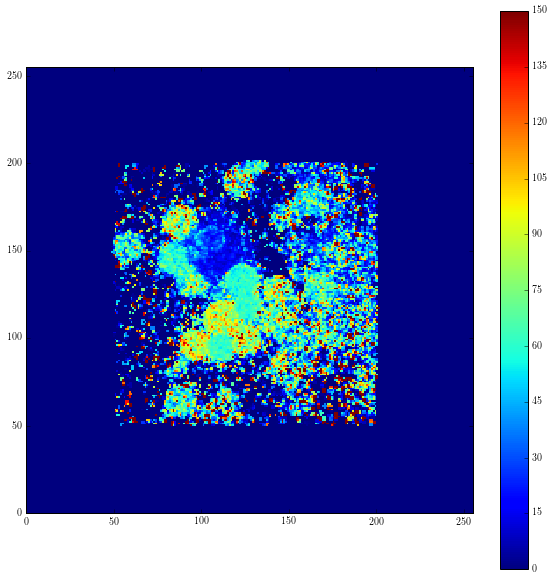

In [238]:
fn.DisplayImage(time_matrix_npts_image_std, vmax=150)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255


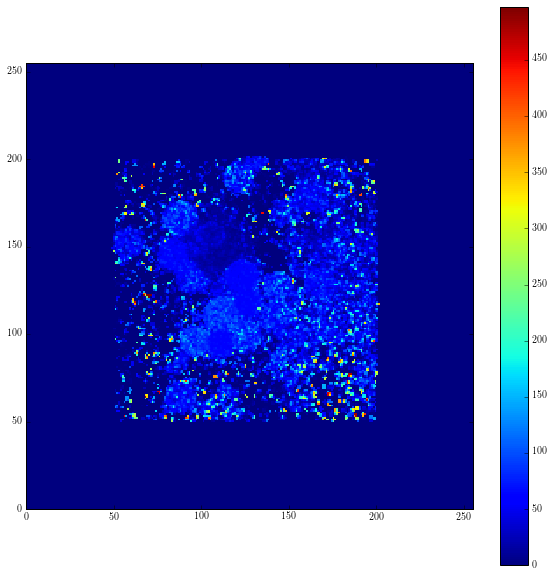

In [234]:
time_matrix_npts_image_mean = np.zeros((256,256), dtype = np.float64)
time_matrix_npts_image_std = np.zeros((256,256), dtype = np.float64)

for x in xrange(256):
    print x
    for y in xrange(256):
        if len(time_matrix[x][y])<=5: continue
        if time_matrix[x][y]:
#             mean, std = time_from_tuple_list(time_matrix[x][y])
#             time_matrix_npts_image_mean[x][y] = mean
#             time_matrix_npts_image_std[x][y] = std

            std = std_custom(time_matrix[x][y])
            time_matrix_npts_image_std[x][y] = std

        else:
            time_matrix_npts_image[x][y] = np.nan

        
# fn.DisplayImage(time_matrix_npts_image_mean)#, vmax='auto')
fn.DisplayImage(time_matrix_npts_image_std)#, vmax='auto')

In [136]:
print len(time_matrix[155][155])

881


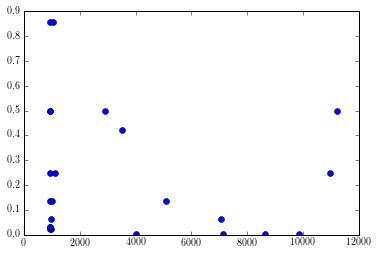

In [226]:
xs, ys = [], []
# for (x,y) in time_matrix[155][100]:
for (x,y) in time_matrix[100][150]:
#     if x<700: continue
#     if x >1200:continue
    xs.append(x)
    ys.append(y)
pl.plot(xs,ys,'o')
# a,b,c = pl.hist(xs, np.append(np.arange(min(xs), min(xs) + 200, 1),np.arange(min(xs)+200, max(xs) +50, 50)))
# a,b,c = pl.hist(xs,10)
# print np.append(np.arange(min(xs), min(xs) + 200, 1),np.arange(min(xs)+200, max(xs) +50, 50))

[  8.58288104e-01   2.90796346e+03]


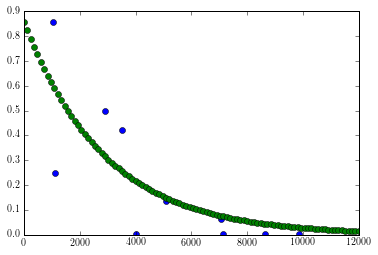

In [127]:
# def func(x, a, t0, tc1, tc2):
def func(x, a, t0):

    # amplitude, t0, tc1, tc2
#     return a * (np.exp((t0 - x)/tc1) - np.exp((t0 - x)/tc2))
    return a * np.exp(-x/t0)

# popt, pcov = curve_fit(func, xdata, ydata)
p0 = [2,900]#,0.0001,0.0002]
params, pcov = curve_fit(func, xs, ys, p0=p0)
print params

pl.plot(xs,ys,'o')
pl.plot(np.linspace(0, 12000, 100),
        [func(_,params[0],params[1]) for _ in np.linspace(0,12000,100)],
#         [func(_,params[0],params[1],params[2],params[3]) for _ in np.linspace(0,12000,100)],
        'o')




/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


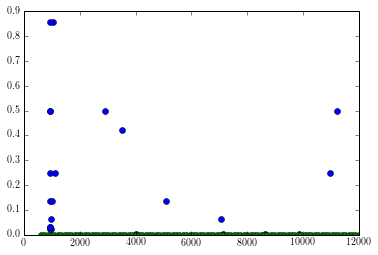

In [89]:
pl.plot(xs,ys,'o')
pl.plot(np.linspace(0, 12000, 100),[func(_,params[0],params[1],params[2],params[3]) for _ in np.linspace(0,12000,100)], 'o')

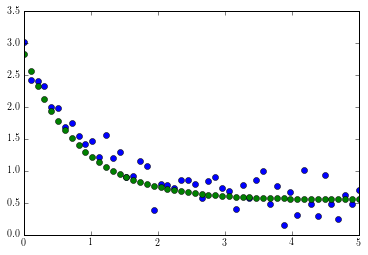

In [78]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c


xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
ydata = y + 0.2 * np.random.normal(size=len(xdata))

popt, pcov = curve_fit(func, xdata, ydata)

pl.plot(np.linspace(0, 5, 50),ydata, 'o')
pl.plot(np.linspace(0, 5, 50),[func(_,popt[0],popt[1],popt[2]) for _ in np.linspace(0,5,50)], 'o')
pl.show()

In [67]:
from scipy.optimize import curve_fit

Auto vmax = 54.3950255006, real max = 792.75


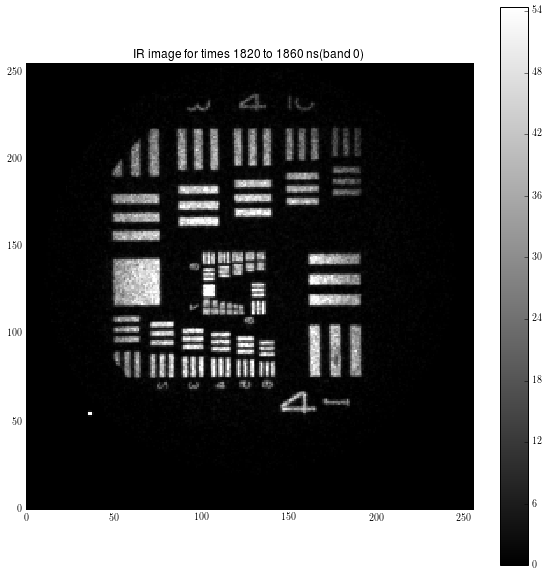

In [50]:
fn = reload(fn)
cmap = 'gray' ### beware using the de facto standard 'jet',

### but it's also replotted below for people who can't live without it
for i, image in enumerate(images_ir):
    title = 'IR image for times %s to %s ns(band #%s)'%(bands[i][0],bands[i][1], i)
    fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto',savefig='/Users/mfisherlevine/Desktop/new_USAF_IR_'+str(i)+'.pdf')
    pl.show()

    

In [ ]:
fn = reload(fn)
cmap = 'jet'
for i, image in enumerate(images):
    title = 'VMI for times %s to %s (band %s)'%(bands[i][0],bands[i][1], i)
    fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto')
    pl.show()

In [ ]:
cmap = 'jet'
image = images[27].copy()
fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto')
pl.show()

import scipy.ndimage as im_process
from scipy.ndimage.filters import gaussian_filter


deriv = im_process.sobel(gaussian_filter(image,3), mode='constant')
fn.DisplayImage(deriv, cmap=cmap, title=title,vmax='auto')
pl.show()

deriv[abs(deriv)<10]=0
fn.DisplayImage(deriv, cmap=cmap, title=title,vmax='auto')
pl.show()

deriv=abs(deriv/abs(deriv))
fn.DisplayImage(deriv, cmap=cmap, title=title)
pl.show()



In [ ]:
from skimage import feature

fn = reload(fn)
cmap = 'jet'
for i, image in enumerate(images):
    image = image.copy()
    if i!=27: continue
#     title = 'Fit to VMI for times %s to %s (band %s)'%(bands[i][0],bands[i][1], i)
    title = 'Band %s'%i

    fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto')
#     image[image < 0.8*np.max(image)] = 0
    image[image < np.percentile(image,97)] = 0

    pl.show()
    
#     edges = feature.canny(image, sigma=3)

    edges = feature.blob_dog(image)
    fn.DisplayImage(edges, cmap=cmap, title=title)
    pl.show()

#     feature.
#     x,y,r = FitCircle(deriv)
#     DisplayImageWithFit(deriv,x,y,r,title=title)
    
#     pl.show()

In [ ]:
fn = reload(fn)
cmap = 'jet'
for i, image in enumerate(images):
#     if i!=3: continue
#     title = 'Fit to VMI for times %s to %s (band %s)'%(bands[i][0],bands[i][1], i)
    title = 'Band %s'%i

    fn.DisplayImage(image, cmap=cmap, title=title,vmax='auto')
    import scipy.ndimage as im_process
    from scipy.ndimage.filters import gaussian_filter

    deriv = im_process.laplace(gaussian_filter(image,2), mode='constant')
#     title += ' gaus, laplace'
#     fn.DisplayImage(deriv, cmap=cmap, title=title)
#     pl.show()

    deriv[deriv < np.percentile(deriv,99.7)] = 0

    title += ' 99.7th percentile cut'
    fn.DisplayImage(deriv, cmap=cmap, title=title)
    pl.show()

    deriv=abs(deriv/abs(deriv))
#     title += ', normed'
#     fn.DisplayImage(deriv, cmap=cmap, title=title)
#     pl.show()

    x,y,r = FitCircle(deriv)
    DisplayImageWithFit(deriv,x,y,r,title=title)
    
    pl.show()

In [ ]:
x,y,r = FitCircle(deriv)
x_circ, y_circ = MakeCirlePointsFromXYR(x,y,r)

In [ ]:
def MakeCirlePointsFromXYR(x, y, r, npts=180):
    theta_fit = np.linspace(-np.pi, np.pi, npts)
    xs = x + r*np.cos(theta_fit)
    ys = y + r*np.sin(theta_fit)
    return xs, ys

In [ ]:
fig = pl.figure(figsize = [10,10])
ax = fig.add_subplot(111)
# ax.set_xlim([YMIN,YMAX])
# ax.set_ylim([XMIN,XMAX])

# if vmax == 'auto':
#     element = (256*256) - 200
#     tmp = image.flatten()
#     tmp.sort()
#     vmax = tmp[element]
#     vmin = tmp[200]
#     print 'Auto vmax = %s, real max = %s'%(vmax, np.max(image))

# if vmin == 'auto':
#     tmp = image.flatten()
#     vmin = min(_ for _ in tmp if _ > 0)
#     print 'Auto vmin = %s'%vmin

im = ax.imshow(deriv)#, vmin=vmin, vmax=vmax, cmap=cmap)
pl.plot(y,x, 'x', ms=15)
pl.plot(y_circ, x_circ, 'r-.')#, label=method_3, lw=2)
ax.set_title(title)
fig.colorbar(im)


In [ ]:
def DisplayImageWithFit(image, x, y, r, vmin=None, vmax=None, cmap='jet', title = ''):
    import numpy as np
    fig = pl.figure(figsize = [10,10])
    ax = fig.add_subplot(111)
    ax.set_xlim([0,255])
    ax.set_ylim([0,255])

    if vmax == 'auto':
        element = (256*256) - 200
        tmp = image.flatten()
        tmp.sort()
        vmax = tmp[element]
        vmin = tmp[200]
        print 'Auto vmax = %s, real max = %s'%(vmax, np.max(image))

    if vmin == 'auto':
        tmp = image.flatten()
        vmin = min(_ for _ in tmp if _ > 0)
        print 'Auto vmin = %s'%vmin

    im = ax.imshow(image, vmin=vmin, vmax=vmax, cmap=cmap)
    
    pl.plot(y,x, 'xb', ms=15) # x on the centre
    x_circ, y_circ = MakeCirlePointsFromXYR(x,y,r) #generate circle points
    pl.plot(y_circ, x_circ, 'r-.', lw=4) #plot circle
    ax.set_title(title)
    fig.colorbar(im)
    return im

In [ ]:
def FitCircle(data):
    import numpy as np
    from scipy import odr

    x,y = np.where(data>=0)
#     x = np.r_[  9, 35, -13,  10,  23,   0]
#     y = np.r_[ 34, 10,   6, -14,  27, -10]
    
    x_m = np.mean(x)
    y_m = np.mean(y)
    
    method_3  = "odr"

    import functools
    def countcalls(fn):
        "decorator function count function calls "

        @functools.wraps(fn)
        def wrapped(*args):
            wrapped.ncalls +=1
            return fn(*args)

        wrapped.ncalls = 0
        return wrapped
    
    @countcalls
    def calc_R(xc, yc):
        """ calculate the distance of each 2D points from the center (xc, yc) """
        return np.sqrt((x-xc)**2 + (y-yc)**2)

    @countcalls
    def f_3(beta, x):
        """ implicit definition of the circle """
        return (x[0]-beta[0])**2 + (x[1]-beta[1])**2 -beta[2]**2

    # initial guess for parameters
    R_m = calc_R(x_m, y_m).mean()
    beta0 = [ x_m, y_m, R_m]

    # for implicit function :
    #       data.x contains both coordinates of the points
    #       data.y is the dimensionality of the response
    lsc_data   = odr.Data(np.row_stack([x, y]), y=1)
    lsc_model  = odr.Model(f_3, implicit=True)
    lsc_odr    = odr.ODR(lsc_data, lsc_model, beta0)
    lsc_out    = lsc_odr.run()

    xc_3, yc_3, R_3 = lsc_out.beta
    Ri_3       = calc_R(xc_3, yc_3)
    residu_3   = sum((Ri_3 - R_3)**2)
    residu2_3  = sum((Ri_3**2-R_3**2)**2)
    ncalls_3   = f_3.ncalls

    # == METHOD 3b ==
    # Advanced usage, with jacobian
    method_3b  = "odr with jacobian"
    print "\nMethod 3b : ", method_3b

    @countcalls
    def f_3b(beta, x):
        """ implicit definition of the circle """
        return (x[0]-beta[0])**2 + (x[1]-beta[1])**2 -beta[2]**2

    @countcalls
    def jacb(beta, x):
        """ Jacobian function with respect to the parameters beta.
        return df_3b/dbeta
        """
        xc, yc, r = beta
        xi, yi    = x

        df_db    = np.empty((beta.size, x.shape[1]))
        df_db[0] =  2*(xc-xi)                     # d_f/dxc
        df_db[1] =  2*(yc-yi)                     # d_f/dyc
        df_db[2] = -2*r                           # d_f/dr

        return df_db

    @countcalls
    def jacd(beta, x):
        """ Jacobian function with respect to the input x.
        return df_3b/dx
        """
        xc, yc, r = beta
        xi, yi    = x

        df_dx    = np.empty_like(x)
        df_dx[0] =  2*(xi-xc)                     # d_f/dxi
        df_dx[1] =  2*(yi-yc)                     # d_f/dyi

        return df_dx


    def calc_estimate(data):
        """ Return a first estimation on the parameter from the data  """
        xc0, yc0 = data.x.mean(axis=1)
        r0 = np.sqrt((data.x[0]-xc0)**2 +(data.x[1] -yc0)**2).mean()
        return xc0, yc0, r0

    # for implicit function :
    #       data.x contains both coordinates of the points
    #       data.y is the dimensionality of the response
    lsc_data  = odr.Data(np.row_stack([x, y]), y=1)
    lsc_model = odr.Model(f_3b, implicit=True, estimate=calc_estimate, fjacd=jacd, fjacb=jacb)
    lsc_odr   = odr.ODR(lsc_data, lsc_model)    # beta0 has been replaced by an estimate function
    lsc_odr.set_job(deriv=3)                    # use user derivatives function without checking
    lsc_odr.set_iprint(iter=1, iter_step=1)     # print details for each iteration
    lsc_out   = lsc_odr.run()

    xc_3, yc_3, R_3 = lsc_out.beta
    Ri_3       = calc_R(xc_3, yc_3)
    residu_3   = sum((Ri_3 - R_3)**2)
    residu2_3  = sum((Ri_3**2-R_3**2)**2)
    ncalls_3   = f_3.ncalls

    print "\nFunctions calls : f_3b=%d jacb=%d jacd=%d" % (f_3b.ncalls, jacb.ncalls, jacd.ncalls)

    
#     def PlotAll():
#         f = pl.figure( facecolor='white')  #figsize=(7, 5.4), dpi=72,
#         pl.axis('equal')

#         theta_fit = np.linspace(-np.pi, np.pi, 180)

#         x_fit3 = xc_3 + R_3*np.cos(theta_fit)
#         y_fit3 = yc_3 + R_3*np.sin(theta_fit)
#         pl.plot(x_fit3, y_fit3, 'r-.', label=method_3, lw=2)

#         pl.plot(xc_3, yc_3, 'x', ms=10)
        
#         pl.plot(x, y, 'o', label='data', ms=3)#, mec='b', mew=1)
#         pl.show()
    
#     PlotAll()

    return xc_3, yc_3, R_3

        
FitCircle(deriv)


In [ ]:
# Snippet for examples of annotating images (not mine):

# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

# ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

In [ ]:
# Snippet to text out luminance balancing of colour maps:
image = np.zeros((256,256), dtype = np.float)
a = fn.makeGaussian(256,1500,50,[100,100])
image += a
print np.max(a)
fn.DisplayImage(image, cmap='jet')
fn.DisplayImage(image, cmap='gray')
fn.DisplayImage(image, cmap='winter')
fn.DisplayImage(image, cmap='cubehelix')

In [ ]:
#     PEAK_SETTINGS_CENTROIDED = {}
#     PEAK_SETTINGS_CENTROIDED['vector'] = global_TOF_centroided
#     PEAK_SETTINGS_CENTROIDED['widths'] = np.asarray([3])
#     PEAK_SETTINGS_CENTROIDED['min_snr']    = [0.015]
#     PEAK_SETTINGS_CENTROIDED['noise_perc'] = [0.0001]

#     peaks_centroided = findpeaks( **PEAK_SETTINGS_CENTROIDED)

#     if fig is None:
#         print 'declared new fig'
#         fig = pl.figure(figsize=[16,8])
#     ax_cent = pl.subplot(212)
#     ax_raw  = pl.subplot(211, sharex=ax_cent)
#     tof1 = ax_cent.plot(range(11810),global_TOF_centroided)
#     tof2 =  ax_raw.plot(range(11810),global_TOF)
#     ax_cent.set_ylim([0,max(global_TOF_centroided[TOF_TMIN:TOF_TMAX])])
#     ax_raw.set_ylim([0,max(global_TOF[TOF_TMIN:TOF_TMAX])])
#     ax_cent.set_xlim([TOF_TMIN,TOF_TMAX])
#     ax_raw.set_xlim([TOF_TMIN,TOF_TMAX])
#     if flip:
#         ax_cent.set_xlim(ax_cent.get_xlim()[::-1])
#     ax_cent.set_title('ToF Centroided')

#     FilterPeaks()
#     print 'Centroided peaks found at %s'%peaks_centroided[::-1]
#     print '       Raw peaks found at %s'%peaks_raw[::-1]

#     if ax_cent is not None:
#         for peak in peaks_centroided:
#             ax_cent.plot([peak, peak], [0, ax_cent.get_ylim()[1]], color='k', linestyle='--', linewidth=1)

#     for peak in peaks_raw:
#         ax_raw.plot([peak, peak], [0, ax_raw.get_ylim()[1]], color='k', linestyle='--', linewidth=1)

#     ax_raw.set_title('ToF RAW')

# #     f.savefig(out_path + 'ToF.png')
#     pl.show()

#     return ax_raw, ax_cent


# def FilterPeaks():
#     import operator
#     search_range = 5
#     cent_threshold = len(tp_data) / 10
#     raw_threshold = len(loaded_fileNAMES) * 2
#     global peaks_centroided
#     global peaks_raw
#     new_peaks_centroided = []
#     new_peaks_raw = []

#     for peak in peaks_centroided:
#         _min = max(peak - search_range, 0)
#         _max = min(peak + search_range, len(global_TOF_centroided))
#         index, maxval = max(enumerate(global_TOF_centroided[_min:_max]), key=operator.itemgetter(1))
#         if maxval >= cent_threshold:
#             new_peaks_centroided.append(_min+index)

#     for peak in peaks_raw:
#         _min = max(peak - search_range, 0)
#         _max = min(peak + search_range, len(global_TOF))
#         index, maxval = max(enumerate(global_TOF[_min:_max]), key=operator.itemgetter(1))
#         if maxval >= raw_threshold:
#             new_peaks_raw.append(_min+index)

#     peaks_centroided = new_peaks_centroided
#     peaks_raw = new_peaks_raw